In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
energy_data=pd.read_csv(r"Energy_Consumption_Data.csv")

In [82]:
energy_data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [83]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [84]:
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Square Footage,1100.0,25500.527273,14236.955632,560.00,13203.750,25785.50,37536.75,49997.00
Number of Occupants,1100.0,48.268182,29.127624,1.00,22.000,47.00,73.00,99.00
Appliances Used,1100.0,25.730000,14.116209,1.00,13.000,26.00,38.00,49.00
Average Temperature,1100.0,22.559745,7.122357,10.05,16.365,22.81,28.76,34.99
Energy Consumption,1100.0,4168.191273,924.278723,1683.95,3510.460,4189.69,4859.51,6530.60


In [85]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [86]:
# Check for missing values
energy_data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [88]:
# Seperating numerical and categorical features in different df
numerical_feature=energy_data.select_dtypes(include=[np.number])
categorical_feature=energy_data.select_dtypes(include = [np.object_])
print("Numerical Features: ",'\n', numerical_feature)
print("Categorical Features: ",'\n', categorical_feature)

Numerical Features:  
       Square Footage  Number of Occupants  Appliances Used  \
0               7063                   76               10   
1              44372                   66               45   
2              19255                   37               17   
3              13265                   14               41   
4              13375                   26               18   
...              ...                  ...              ...   
1095            1161                   81               11   
1096           37943                   50               23   
1097            1558                   27               29   
1098            2145                   56               12   
1099           42414                   72               24   

      Average Temperature  Energy Consumption  
0                   29.84             2713.95  
1                   16.72             5744.99  
2                   14.30             4101.24  
3                   32.82             30

### Understanding the Data
 ##### checking the distribution of data is a crucial step in the data analysis process, as it guides your decisions on preprocessing, analysis, and modeling. Understanding the distribution allows you to apply the most appropriate techniques and achieve more accurate and reliable results.

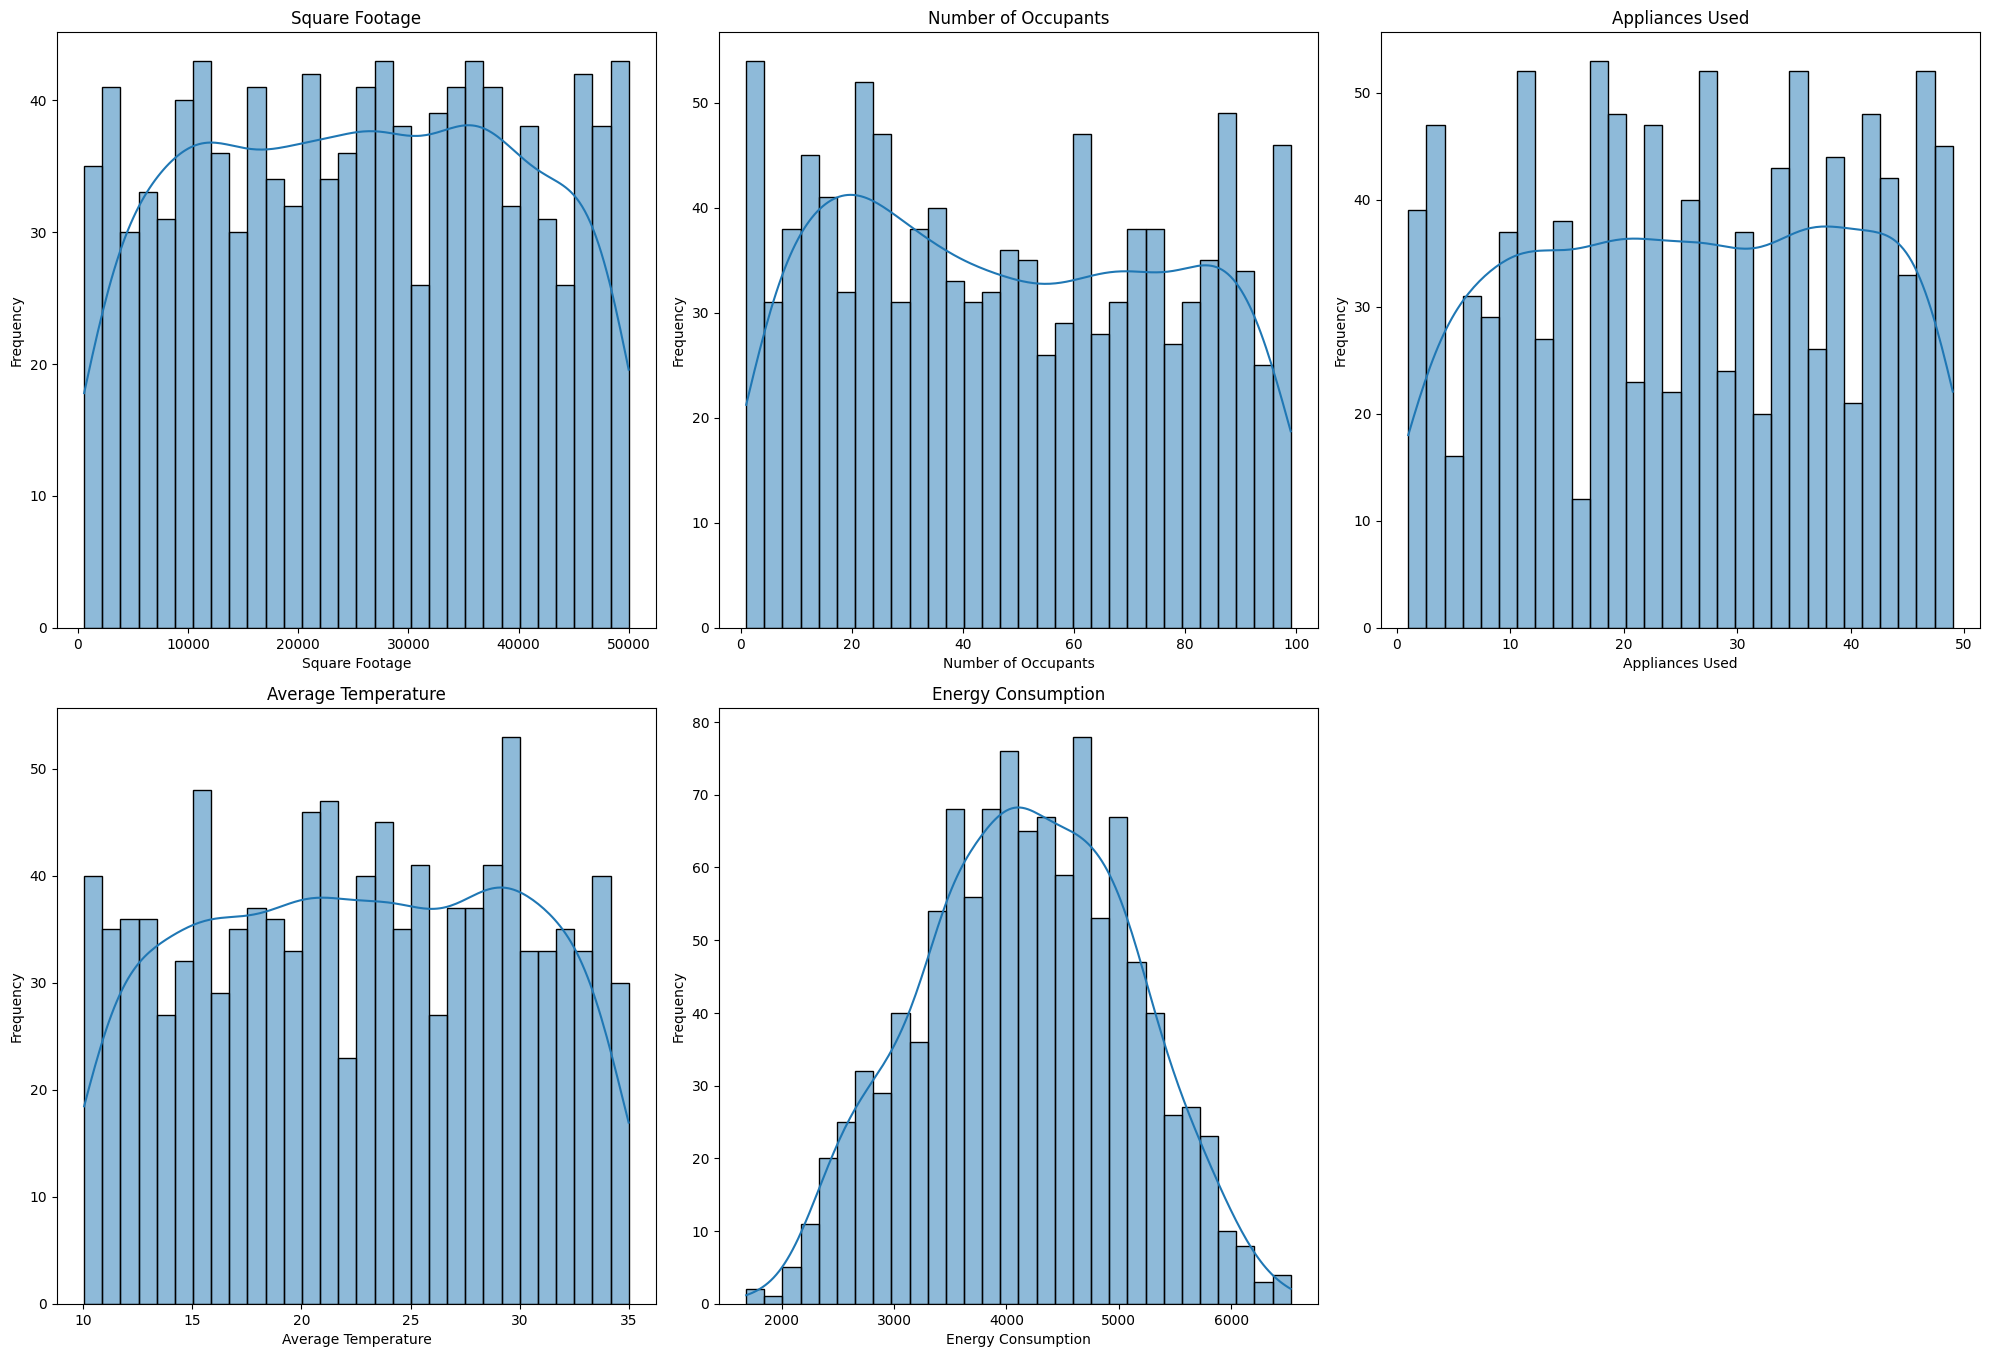

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions of numerical features
plt.figure(figsize=(20, 20))
for i, column in enumerate(numerical_feature.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(energy_data[column], bins=30, kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()




### Investigate categorical variables (Building Type and Day of week)...
##### Analyze how Building type and Day of week related Energy Consumption..

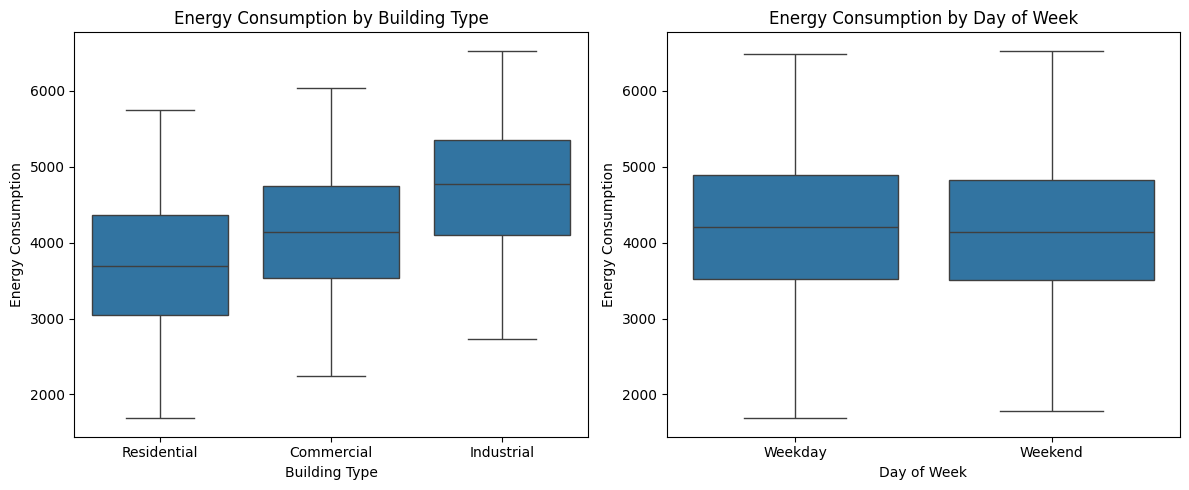

In [89]:
# Boxplots for categorical variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Building Type", y="Energy Consumption", data=energy_data)
plt.title("Energy Consumption by Building Type")

plt.subplot(1, 2, 2)
sns.boxplot(x="Day of Week", y="Energy Consumption", data=energy_data)
plt.title("Energy Consumption by Day of Week")

plt.tight_layout()
plt.show()

#### Now I will check the correlation between numerical features and target variable to see how they are related to each other.

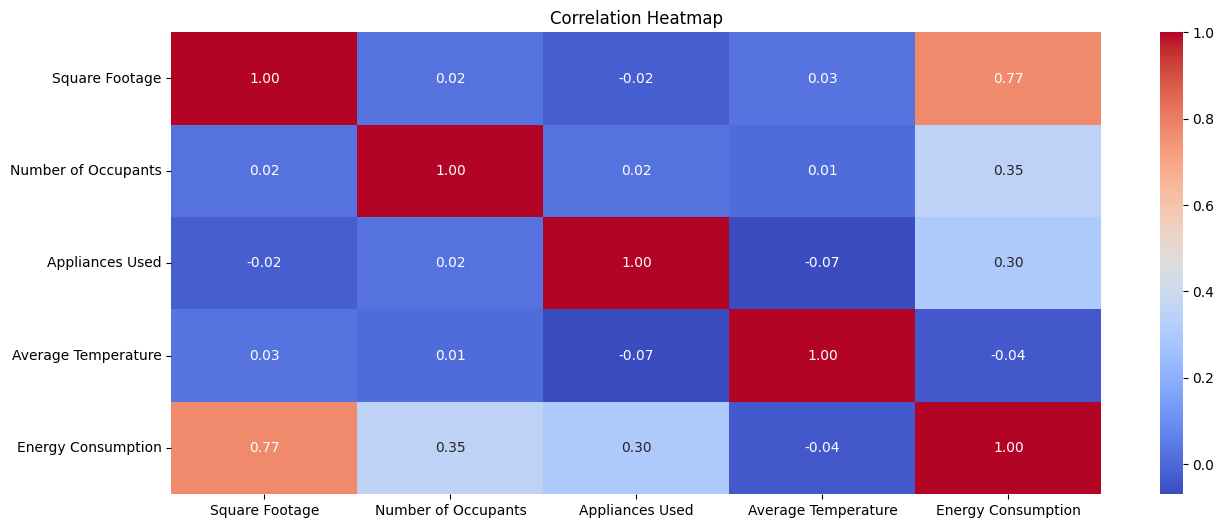

In [92]:
#Plotting corelation matrix for numerical features
plt.figure(figsize=(15, 6))
sns.heatmap(numerical_feature.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Observations from Correlation Heatmap:
##### Energy Consumption has strong correlations with Square Footage (Positive correlation). Number of Occupants and Appliances Used (Moderate positive correlation). Average Temperature has a weak correlation with Energy Consumption, suggesting it may have a limited effect.

### As we have two categorical feature, lets change them in numerical column

In [93]:
# Map categorical features to numerical values
building_type_map = {"Residential": 1, "Commercial": 2, "Industrial": 3}
day_of_week_map = {"Weekday": 1, "Weekend": 0}

energy_data["Building Type"] = energy_data["Building Type"].map(building_type_map)
energy_data["Day of Week"] = energy_data["Day of Week"].map(day_of_week_map)


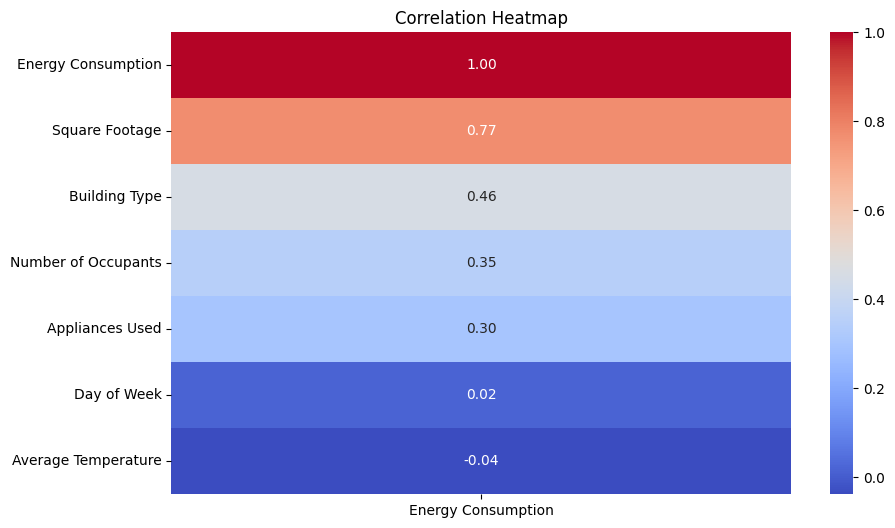

In [94]:
#show heatmap to see the correlation between the categorical features and the target variable
plt.figure(figsize=(10, 6))
sns.heatmap(energy_data.corr()[["Energy Consumption"]].sort_values(by="Energy Consumption", ascending=False), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#### High Correlation Observations:

##### Square Footage (0.77) has a strong positive correlation with Energy Consumption, meaning that larger buildings tend to consume more energy.
##### Building type (0.46) has a also strong positive correlation with Energy Consumption, meaning that different type of building  tend to consume more energy. we will do further investigation on this topic later..
##### Number of Occupants (0.35) shows a moderate positive correlation, indicating that more occupants are associated with higher energy consumption, though the relationship is weaker compared to above two features.
##### Appliances Used (0.30) has a moderate correlation, meaning that more appliances lead to higher energy consumption, as expected.

##### Investigate of Energy Consumption by Building Type:
#### Residential Buildings : show the lowest energy consumption. Commercial Buildings : have a moderate energy consumption range. Industrial Buildings : tend to have the highest energy consumption, with the median much higher than the others.

##### Implication: Building type strongly influences energy consumption, making it a key feature.

In [111]:
# Now I will check how much energy each building type consumes on each day of the week..
# Calculate total energy consumption for each building type on weekdays and weekends
total_consumption = energy_data.groupby(['Day of Week', 'Building Type'])['Energy Consumption'].sum().reset_index()
print(total_consumption)

   Day of Week  Building Type  Energy Consumption
0            0              1           672608.34
1            0              2           758277.58
2            0              3           848567.07
3            1              1           753667.74
4            1              2           745016.24
5            1              3           806873.43


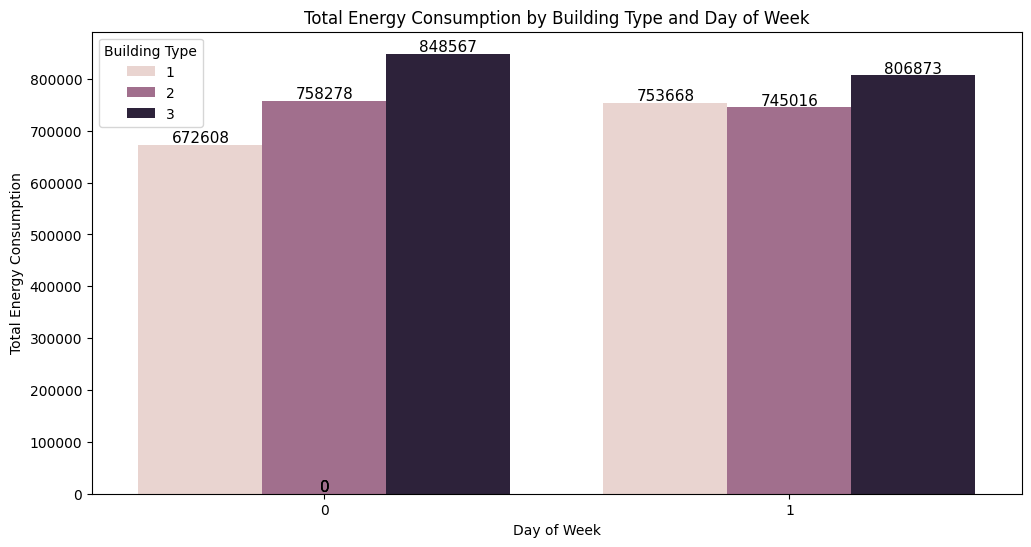

In [112]:
# Create the bar chart 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Day of Week', y='Energy Consumption', hue='Building Type', data=total_consumption)

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points'
               )

# Set plot title and labels
plt.title('Total Energy Consumption by Building Type and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Energy Consumption')
plt.legend(title='Building Type')
plt.show()

#### Model preparation to do prediction

In [113]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = energy_data.drop("Energy Consumption", axis=1)
y= energy_data["Energy Consumption"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#### Now I will train a linear regression model on the training data and evaluate its performance on the test data.
#### I will use the mean squared error (MSE) as the evaluation metric to compare the performance of different models like linear regression, decision tree, random forest.

In [128]:
# make a pipeline to preprocess the data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linr=LinearRegression()
linr.fit(X_train, y_train)
yl_pred=linr.predict(X_test)
mse=mean_squared_error(y_test, yl_pred)
r2=r2_score(y_test, yl_pred)
print("Mean Squared Error :", mse)
print("r2_Score :", r2)

Mean Squared Error : 0.00019551065677964077
r2_Score : 0.999999999765845


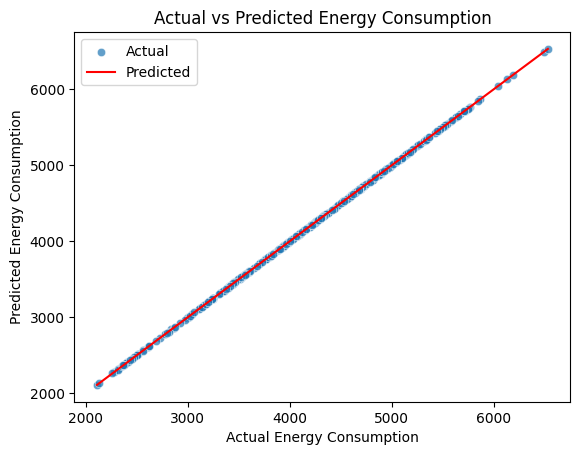

In [129]:
# actual vs predicted values
sns.scatterplot(x=y_test, y=yl_pred, alpha=0.7)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.legend(["Actual", "Predicted"])

### What does this result says:
##### MSE: 0.00019551065677964077, MSE measures the average squared difference between the predicted and actual values. Smaller values indicate better predictions. This extremely low MSE suggests that the model's predictions are almost perfectly aligned with the actual values, with very minimal error.

#### R 2 Score: 0.999999999765845, measures the proportion of variance in the dependent variable (Energy Consumption) that is explained by the independent variables. It shows how well the model captures variability in the data

In [124]:
from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor()
d.fit(X_train,y_train)
yd_pred=d.predict(X_test)
mse=mean_squared_error(y_test,yd_pred)
r2=r2_score(y_test,yd_pred)
print("Mean Squared Error:", mse)
print("r2_Score:", r2)

Mean Squared Error: 56329.793821212115
r2_Score: 0.9325361495165918


### Observation of Descision Tree Regression..

#### MSE(58496): Compared to the earlier MSE 0.0001955, this value is much higher, suggesting that the Decision Tree model's predictions are less accurate than our earlier model (Linear Regression)
#### R2 Score: This means the model explains 93% of the variance in the data, which is still strong but less than the nearly perfect 𝑅2 from our earlier model (0.9999999).


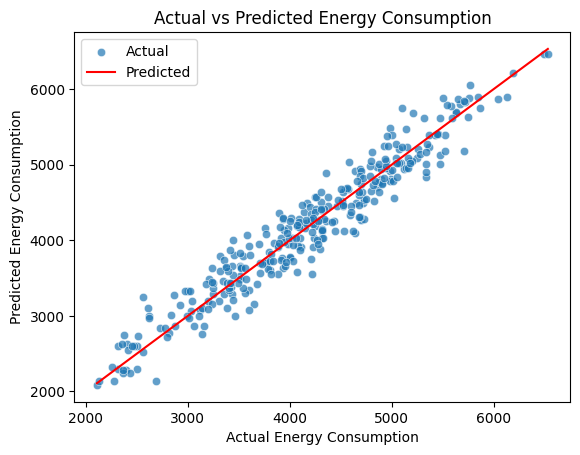

In [130]:
# actual vs predicted values
sns.scatterplot(x=y_test, y=yd_pred, alpha=0.7)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.legend(["Actual", "Predicted"])




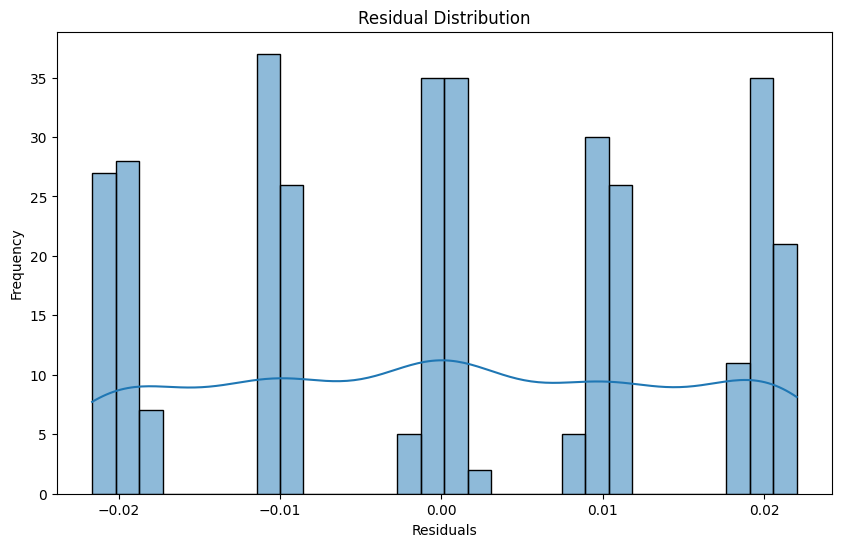

In [133]:
# Residual analysis for linear regression model
residuals = y_test - yl_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

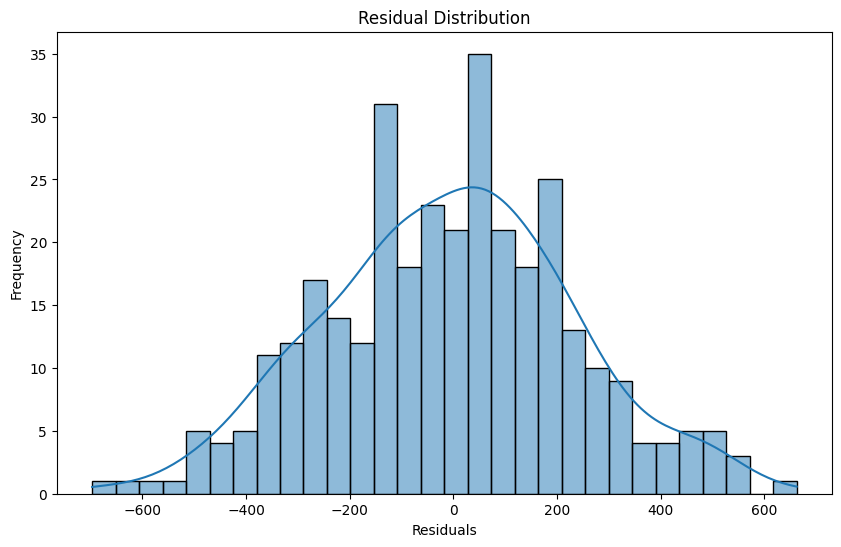

In [132]:
# Residual analysis for linear regression model
residuals = y_test - yd_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [134]:
# Import model to do cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linr, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", scores)
print("Average 5-Fold CV R2:", scores.mean())

# Compare training r2 and test r2
print("Training R2:", linr.score(X_train, y_train))
print("Test R2:", linr.score(X_test, y_test))

Cross-validated R2 scores: [1. 1. 1. 1. 1.]
Average 5-Fold CV R2: 0.9999999997753249
Training R2: 0.9999999997857085
Test R2: 0.999999999765845


#### Cross-validated R2 Scores: [1. 1. 1. 1. 1.] During cross-validation, the model achieved an R2 of 1.0 on all folds.R2=1.0 means the model perfectly explains 100% of the variance in the data during validation.This indicates that the model generalizes exceptionally well across all subsets of the data used for cross-validation.

#### Both Training and Test Data R2 shows nearly 100%. Data fits well to the patterns being modeled  and on unseen test data also the model retains nearly perfect predictive power

## Conclusion: "This analysis demonstrated the strong predictive power of linear regression for modeling energy consumption, leveraging simple, interpretable relationships.
## Model perfermance is almost perfect and the almost same result we can see from the notebook wichone i took as a refrence. I tried to do follow my own way and pattern that what do i want to see from this analysis. After doing this anlysis i can say my notebook also shows a good documentation, as well as explained and well fitted model.